# Imports

In [59]:
import sys, os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

In [78]:
sales_path = "../data/sales_dataset/Books_Data_Cleaner.csv"
# sales_cols = ['index', 'Publishing Year', 'Book Name', 'Author', 'language_code', 'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre', 'gross sales', 'publisher revenue', 'sale price', 'sales rank', 'Publisher', 'units sold']
sales_df = pd.read_csv(sales_path)
sales_df.head(3)

,index,publishing year,book name,author,language code,author rating,book average rating,book ratings count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500


In [79]:
recs_books_path = "../data/recommendation_dataset/Books.csv"
recs_books_df = pd.read_csv(recs_books_path, low_memory=False)
recs_books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [27]:
recs_ratings_path = "../data/recommendation_dataset/Ratings.csv"
recs_ratings_df = pd.read_csv(recs_ratings_path)
recs_ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [28]:
recs_users_path = "../data/recommendation_dataset/Users.csv"
recs_users_df = pd.read_csv(recs_users_path)
recs_users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


# Sales Plots

In [80]:
sales_df.head(3)

,index,publishing year,book name,author,language code,author rating,book average rating,book ratings count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500


genre
genre fiction    822
nonfiction       171
fiction           62
children          15
Name: count, dtype: int64


<Axes: ylabel='count'>

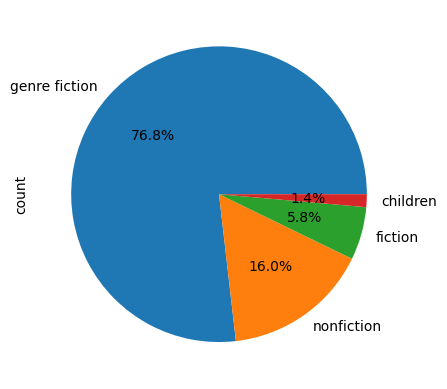

In [81]:
genre_counts = sales_df['genre'].value_counts(dropna=False)
print(genre_counts)
genre_counts.plot.pie(autopct='%1.1f%%', shadow=False)

# "Fiction" encompasses any story created from imagination, 
# while "genre fiction" is a specific type of fiction that adheres to established conventions and tropes 
# within a particular genre like romance, mystery, or science fiction.

# Not that useful of a column, toss.

language code
eng      737
en-US    234
NaN       53
en-GB     30
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64


<Axes: ylabel='count'>

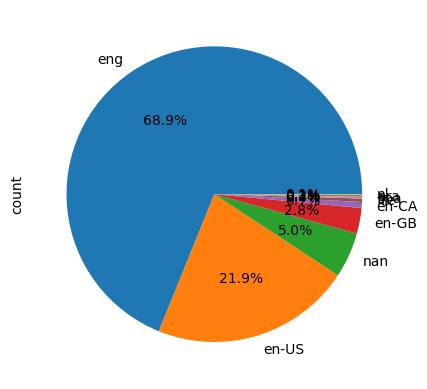

In [82]:
lang_counts = sales_df['language code'].value_counts(dropna=False)
print(lang_counts)
lang_counts.plot.pie(autopct='%1.1f%%', shadow=False)

publisher
Amazon Digital Services,  Inc.          600
Random House LLC                        120
Penguin Group (USA) LLC                 108
HarperCollins Publishers                 71
Hachette Book Group                      66
Simon and Schuster Digital Sales Inc     56
Macmillan                                41
HarperCollins Publishing                  4
HarperCollins Christian Publishing        4
Name: count, dtype: int64


<Axes: ylabel='count'>

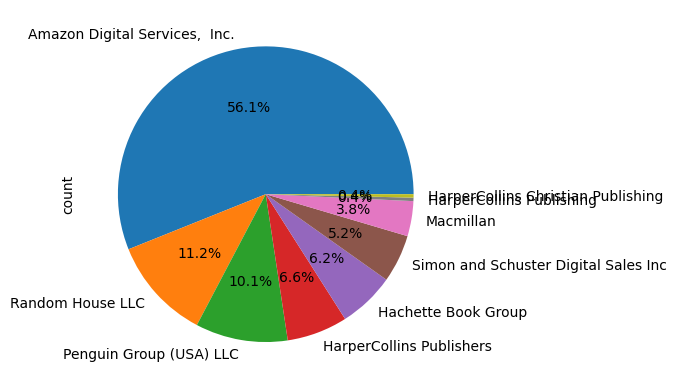

In [88]:
publisher_counts = sales_df['publisher'].value_counts(dropna=False)
print(publisher_counts)
publisher_counts.plot.pie(autopct='%1.1f%%', shadow=False)

author rating
Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: count, dtype: int64


<Axes: ylabel='count'>

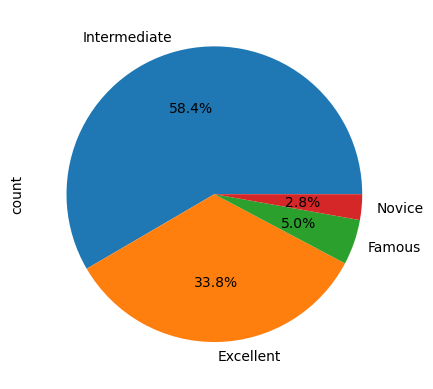

In [89]:
author_rating_counts = sales_df['author rating'].value_counts(dropna=False)
print(author_rating_counts)
author_rating_counts.plot.pie(autopct='%1.1f%%', shadow=False)

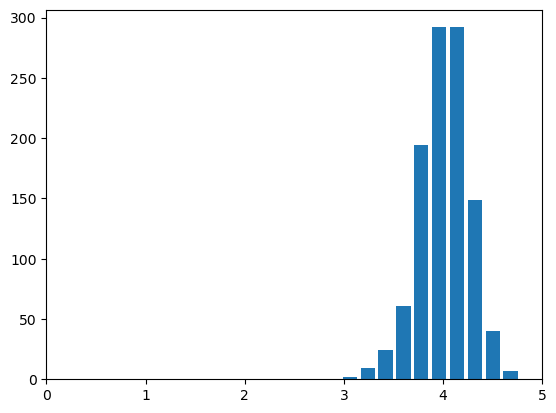

In [84]:
plt.hist(sales_df['book average rating'], bins=10, rwidth=0.8)
plt.xlim((0, 5))
plt.show()

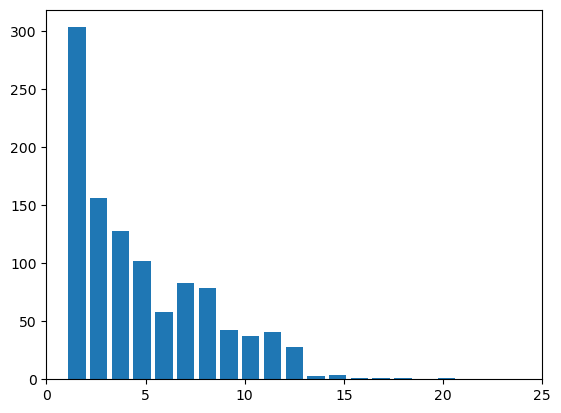

In [77]:
plt.hist(sales_df['sale price'], bins=30, rwidth=0.8)
plt.xlim((0, 25))
plt.show()

# Recs Plots